In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Plot MACs and Weights Per Layer

In [2]:
def plot_nets(model_ops_dict):

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    
    ######################## AIMET FPGA ########################
    plt.subplot(1, 2, 1)
    ax[0].bar(list(model_ops_dict["layers"].keys()), list(model_ops_dict["macs"].values()))
    ax[0].set_xticks(list(model_ops_dict["layers"].keys()))
    ax[0].set_xticklabels(list(model_ops_dict["layers"].keys()), rotation=90)
    ax[0].set_title("MACs Per Layer")
    
    plt.subplot(1, 2, 2)
    plt.axhline(y=16384, color='r', linestyle='--')
    plt.axhline(y=16384/2, color='r', linestyle='--')
    plt.axhline(y=16384/4, color='r', linestyle='--')
    plt.axhline(y=32768, color='r', linestyle='--')
    plt.ylim([0, 20000])
    ax[1].bar(list(model_ops_dict["layers"].keys()), list(model_ops_dict["weights"].values()))
    ax[1].set_xticks(list(model_ops_dict["layers"].keys()))
    ax[1].set_xticklabels(list(model_ops_dict["layers"].keys()), rotation=90)
    ax[1].set_title("Weights Per Layer")
    
    plt.tight_layout()
    plt.show()

# Model Definitions

#### Adapted for FPGA

In [3]:
# aimet_fpga = {
#     "conv1":   {"kernel": 3,      "in": 3,  "out": 12, "dims": 230},
   
#     "conv20":  {"kernel": (3, 1), "in": 12, "out": 20, "dims": 114},
#     "conv21":  {"kernel": (1, 3), "in": 20, "out": 16, "dims": 114},
    
#     "conv31":  {"kernel": 1,      "in": 16, "out": 16, "dims": 56},
#     "conv320": {"kernel": (3, 1), "in": 16, "out": 20, "dims": 56},
#     "conv321": {"kernel": (1, 3), "in": 20, "out": 32, "dims": 56},
#     "conv33":  {"kernel": 1,      "in": 32, "out": 32, "dims": 54},
#     "conv340": {"kernel": (3, 1), "in": 32, "out": 40, "dims": 54}, # ori 32, 32
#     "conv341": {"kernel": (1, 3), "in": 40, "out": 64, "dims": 54}, # ori 32, 64
    
#     "conv41":  {"kernel": 1,      "in": 64, "out": 32, "dims": 26}, # ori 64, 32
#     "conv42":  {"kernel": 3,      "in": 32, "out": 56, "dims": 26}, # ori 62, 64
#     "conv43":  {"kernel": 1,      "in": 56, "out": 32, "dims": 24}, # ori 64, 32
#     "conv440": {"kernel": (3, 1), "in": 32, "out": 40, "dims": 24}, # ori 32, 48
#     "conv441": {"kernel": (1, 3), "in": 40, "out": 56, "dims": 24}, # ori 48, 64
#     "conv45":  {"kernel": 1,      "in": 56, "out": 32, "dims": 22}, # ori 64, 32
#     "conv460": {"kernel": (3, 1), "in": 32, "out": 20, "dims": 22}, # ori 32, 16 
#     "conv461": {"kernel": (1, 3), "in": 20, "out": 64, "dims": 22}, # ori 16, 64
    
#     "linear1": {"in": 64, "out": 32},
#     "linear2": {"in": 32, "out": 16},
#     "linear3": {"in": 16, "out": 2},

#     # "linear1": {"in": 64, "out": 32},
#     # "linear2": {"in": 32, "out": 2},
# }

# aimet_fpga = {
#     "conv1":   {"kernel": 3,      "in": 3,  "out": 12, "dims": 230},
   
#     "conv20":  {"kernel": (3, 1), "in": 12, "out": 24, "dims": 114},
#     "conv21":  {"kernel": (1, 3), "in": 24, "out": 16, "dims": 114},
    
#     "conv31":  {"kernel": 1,      "in": 16, "out": 16, "dims": 56},
#     "conv320": {"kernel": (3, 1), "in": 16, "out": 16, "dims": 56},
#     "conv321": {"kernel": (1, 3), "in": 16, "out": 32, "dims": 56},
#     "conv33":  {"kernel": 1,      "in": 32, "out": 32, "dims": 54},
#     "conv340": {"kernel": (3, 1), "in": 32, "out": 42, "dims": 54}, # ori 32, 32
#     "conv341": {"kernel": (1, 3), "in": 42, "out": 64, "dims": 54}, # ori 32, 64
    
#     "conv41":  {"kernel": 1,      "in": 64, "out": 30, "dims": 26}, # ori 64, 32
#     "conv42":  {"kernel": 3,      "in": 30, "out": 60, "dims": 26}, # ori 62, 64
#     "conv43":  {"kernel": 1,      "in": 60, "out": 32, "dims": 24}, # ori 64, 32
#     "conv440": {"kernel": (3, 1), "in": 32, "out": 42, "dims": 24}, # ori 32, 48
#     "conv441": {"kernel": (1, 3), "in": 42, "out": 58, "dims": 24}, # ori 48, 64
#     "conv45":  {"kernel": 1,      "in": 58, "out": 32, "dims": 22}, # ori 64, 32
#     "conv460": {"kernel": (3, 1), "in": 32, "out": 20, "dims": 22}, # ori 32, 16 
#     "conv461": {"kernel": (1, 3), "in": 20, "out": 64, "dims": 22}, # ori 16, 64

#     "linear1": {"in": 64, "out": 32},
#     "linear2": {"in": 32, "out": 2},
# }

### FINAL MODEL SMALL BIG
aimet_fpga = {
    "conv1":   {"kernel": 3,      "in": 3,  "out": 12, "dims": 230},
   
    "conv20":  {"kernel": (3, 1), "in": 12, "out": 24, "dims": 114},
    "conv21":  {"kernel": (1, 3), "in": 24, "out": 16, "dims": 114},
    
    "conv31":  {"kernel": 1,      "in": 16, "out": 16, "dims": 56},
    "conv320": {"kernel": (3, 1), "in": 16, "out": 16, "dims": 56},
    "conv321": {"kernel": (1, 3), "in": 16, "out": 32, "dims": 56},
    "conv33":  {"kernel": 1,      "in": 32, "out": 32, "dims": 54},
    "conv340": {"kernel": (3, 1), "in": 32, "out": 44, "dims": 54}, # ori 32, 32
    "conv341": {"kernel": (1, 3), "in": 44, "out": 64, "dims": 54}, # ori 32, 64
    
    "conv41":  {"kernel": 1,      "in": 64, "out": 32, "dims": 26}, # ori 64, 32
    "conv42":  {"kernel": 3,      "in": 32, "out": 64, "dims": 26}, # ori 62, 64
    "conv43":  {"kernel": 1,      "in": 64, "out": 32, "dims": 24}, # ori 64, 32
    "conv440": {"kernel": (3, 1), "in": 32, "out": 44, "dims": 24}, # ori 32, 48
    "conv441": {"kernel": (1, 3), "in": 44, "out": 60, "dims": 24}, # ori 48, 64
    "conv45":  {"kernel": 1,      "in": 60, "out": 32, "dims": 22}, # ori 64, 32
    "conv460": {"kernel": (3, 1), "in": 32, "out": 20, "dims": 22}, # ori 32, 16 
    "conv461": {"kernel": (1, 3), "in": 20, "out": 64, "dims": 22}, # ori 16, 64

    "linear1": {"in": 64, "out": 32},
    "linear2": {"in": 32, "out": 2},
}

# Function to compute MAC and Weights

In [4]:
def compute_macs_and_weights(model):
    for k in model.keys():
        if "conv" in k:
            if type(model[k]["kernel"]) == tuple:
                model[k].update({"mac": 
                    (model[k]["kernel"][0]*model[k]["kernel"][1]) * model[k]["in"] * model[k]["out"] * (model[k]["dims"]**2)})
                model[k].update({"weights": 
                    (model[k]["kernel"][0]*model[k]["kernel"][1]) * model[k]["in"] * model[k]["out"]})
            elif type(model[k]["kernel"]) == int:
                model[k].update({"mac": (model[k]["kernel"]**2) * model[k]["in"] * model[k]["out"] * (model[k]["dims"]**2)})
                model[k].update({"weights": (model[k]["kernel"]**2) * model[k]["in"] * model[k]["out"]})
            else:
                print("Wrong model definition")
        elif "linear" in k:
            model[k].update({"mac": model[k]["in"] * model[k]["out"]})
            model[k].update({"weights": model[k]["in"] * model[k]["out"]})
        else:
            print("Wrong layer definition")

    model_macs = {k: model[k]["mac"]  for k in model.keys()}
    total_macs = np.array([v for v in model_macs.values()]).sum()
    model_weights = {k: model[k]["weights"]  for k in model.keys()}
    total_weights = np.array([v for v in model_weights.values()]).sum()

    return {
        "layers": model,
        "macs": model_macs,
        "total_macs": total_macs,
        "weights": model_weights,
        "total_weights": total_weights,
    }

In [5]:
aimet_fpga_ops = compute_macs_and_weights(aimet_fpga)

In [6]:
print("Aimet FPGA model:"
      + f'\n\tMACs = {aimet_fpga_ops["total_macs"]}\n\tWeights = {aimet_fpga_ops["total_weights"]}')

Aimet FPGA model:
	MACs = 117043536
	Weights = 63060


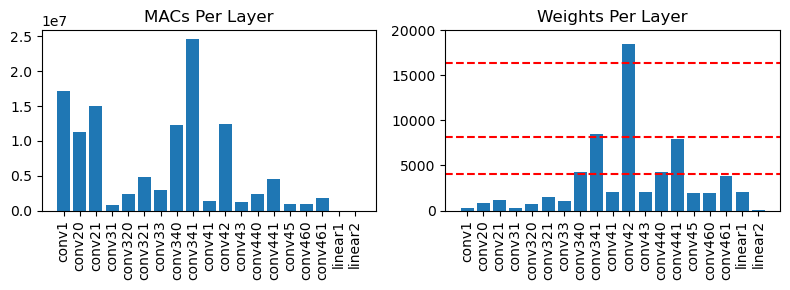

In [7]:
plot_nets(aimet_fpga_ops)

# Efficiency

In [8]:
def closest_2pow(n):
    i = 0
    res = 0
    while(res == 0):
        i += 1
        res = int(2**i / n)
    eff = n / (2**i)
    out = {}
    out["close_2pow"] = 2**i
    out["efficiency"] = eff
    return out

# Aimet FPGA

In [9]:
for k, v in aimet_fpga_ops["macs"].items():
    print(f'{k:<10} {v}')

conv1      17139600
conv20     11228544
conv21     14971392
conv31     802816
conv320    2408448
conv321    4816896
conv33     2985984
conv340    12317184
conv341    24634368
conv41     1384448
conv42     12460032
conv43     1179648
conv440    2433024
conv441    4561920
conv45     929280
conv460    929280
conv461    1858560
linear1    2048
linear2    64


In [10]:
for k, v in aimet_fpga_ops["weights"].items():
    two_pow_dic = closest_2pow(v)
    str1 = "closest 2 pow:"
    str2 = "efficiency:"
    kstr = k + ':'
    print(f'{kstr:<10} {v:<10} - {str1:<10} {two_pow_dic["close_2pow"]:<7} - {str2:<10} {two_pow_dic["efficiency"]:.2f}')

conv1:     324        - closest 2 pow: 512     - efficiency: 0.63
conv20:    864        - closest 2 pow: 1024    - efficiency: 0.84
conv21:    1152       - closest 2 pow: 2048    - efficiency: 0.56
conv31:    256        - closest 2 pow: 256     - efficiency: 1.00
conv320:   768        - closest 2 pow: 1024    - efficiency: 0.75
conv321:   1536       - closest 2 pow: 2048    - efficiency: 0.75
conv33:    1024       - closest 2 pow: 1024    - efficiency: 1.00
conv340:   4224       - closest 2 pow: 8192    - efficiency: 0.52
conv341:   8448       - closest 2 pow: 16384   - efficiency: 0.52
conv41:    2048       - closest 2 pow: 2048    - efficiency: 1.00
conv42:    18432      - closest 2 pow: 32768   - efficiency: 0.56
conv43:    2048       - closest 2 pow: 2048    - efficiency: 1.00
conv440:   4224       - closest 2 pow: 8192    - efficiency: 0.52
conv441:   7920       - closest 2 pow: 8192    - efficiency: 0.97
conv45:    1920       - closest 2 pow: 2048    - efficiency: 0.94
conv460:  